# Finding the traffic indicators of I-94 Traffic

We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

### Read data using pandas library.

In [1]:
import pandas as pd
metro_traffic_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Examine the dataset.
print(metro_traffic_data.head())
print(metro_traffic_data.tail())
metro_traffic_data.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

The [dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

### Analyzing Traffic Volume

Text(0, 0.5, 'Frequency')

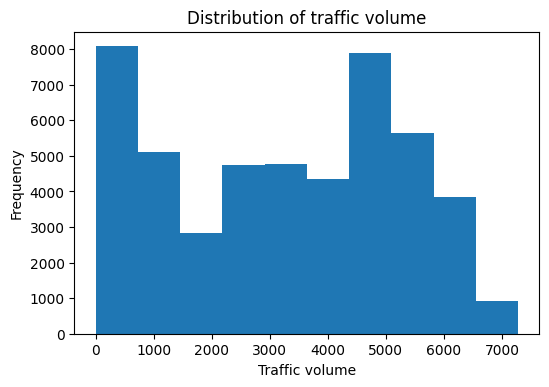

In [2]:
# import matplotlib for plotting graphs.
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(metro_traffic_data['traffic_volume'])
plt.title('Distribution of traffic volume')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')

In [3]:
# Find the statistics of traffic column.
metro_traffic_data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

    Observations:
    (-) Count - The dataset has 48204 traffic records.
    (-) Mean - The average traffic vehicle is 3260 per hour.
    (-) Std - The standard deviation is 1987
    (-) Min - The minimum traffic vehicle is 0 per hour.
    (-) Max - The maximum traffic vehicle is 7280 per hour.
    (-) 25% - The 25% of the traffic vehicle is 1193.
    (-) 50% - The 50% of the traffic vehicle is 3380.
    (-) 75% - The 75% of the traffic vehicle is 4933.



### Traffic Volume: Day vs. Night (II)

Split the data frame into two. One is for daytime and another one is for nighttime.

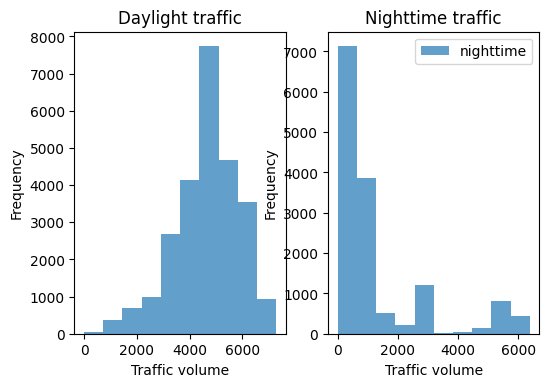

In [4]:
# Convert datetime column from object to datetime.
metro_traffic_data['date_time'] = pd.to_datetime(metro_traffic_data['date_time'])
daytime_traffic = metro_traffic_data[(metro_traffic_data['date_time'].dt.hour >= 7) & (metro_traffic_data['date_time'].dt.hour <= 19)].copy()
nighttime_traffic = metro_traffic_data[~(metro_traffic_data['date_time'].dt.hour >= 7) & (metro_traffic_data['date_time'].dt.hour <= 19)].copy()

# Plot histogram for both datetime and nighttime dataframe.
plt.subplot(1, 2, 1)
plt.hist(daytime_traffic['traffic_volume'], alpha=0.7, label='daytime')
plt.title("Daylight traffic")
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(nighttime_traffic['traffic_volume'], alpha=0.7, label='nighttime')
plt.title("Nighttime traffic")
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Daylight obeservation:

    (-) Total number of vehicles on daytime is 25838
    (-) The average number of vehicles are 4649
    (-) The standard deviation on daytime is 1202
    (-) The minimum to maximum vehicle count is 0 to 7280
    (-) The 25% of vehicles on daytime is 4021
    (-) The 50% of vehicles on daytime is 4736
    (-) The 75% of vehicles on daytime is 5458

    The shape of histogram is left-skewed distribution. The maximum traffic is caused bu 4000 to 5000 vehicles. That means traffic is high in daytime.

Nighttime obeservation:

    (-) Total number of vehicles on nighttime is 14371
    (-) The average number of vehicles are 1303
    (-) The standard deviation on daytime is 1575
    (-) The minimum to maximum vehicle count is 1 to 6386
    (-) The 25% of vehicles on daytime is 373
    (-) The 50% of vehicles on daytime is 644
    (-) The 75% of vehicles on daytime is 6386
    
    The shape of histogram is right-skewed distribution. The maximum traffic is caused by 4000 to 5000 vehicles. That means traffic is low in nighttime.


### Calculate monthly traffic volume averages by month

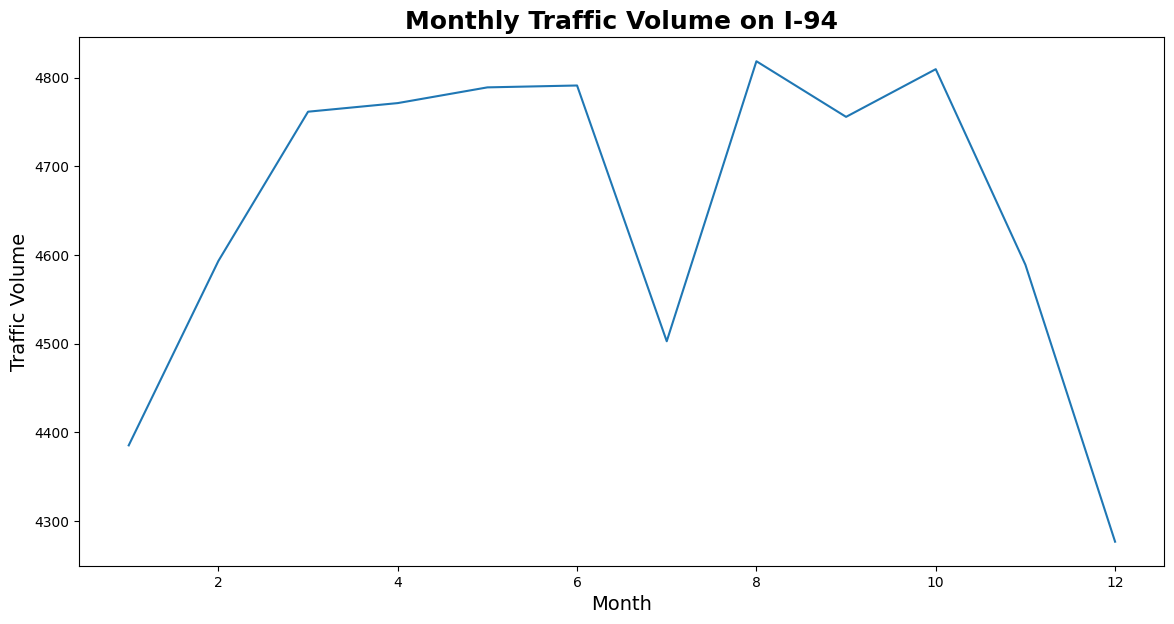

In [5]:
# create a new column for the month of the traffic time.
daytime_traffic['month'] = daytime_traffic['date_time'].dt.month
by_month = daytime_traffic.groupby('month').mean()
# Draw a line plot with traffic volume and month.
plt.figure(figsize=(14, 7))
plt.plot(by_month['traffic_volume'])

# Set plot title and labels
plt.title('Monthly Traffic Volume on I-94', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.show()

Observations:
Spring (March through May) - The traffic is slightly increased.
Summer (End of June through the end of August) - The traffic decreased from 4800 t0 4500 and rised above 4800.
Fall - late September and mid-October- The traffic increased from 4600 t0 slightly above 4800.
Winter - November to February - The traffic increased from 4300 t0 above 4500.

So, the traffic volume is low between November through February i.e., cold season and high between March to October i.e., Spring, Summer and Fall season. But, the mid of summer (July) has the dip in traffic volume and we can analyze the cause for this dip. 

### Calculate monthly traffic volume averages by day of week

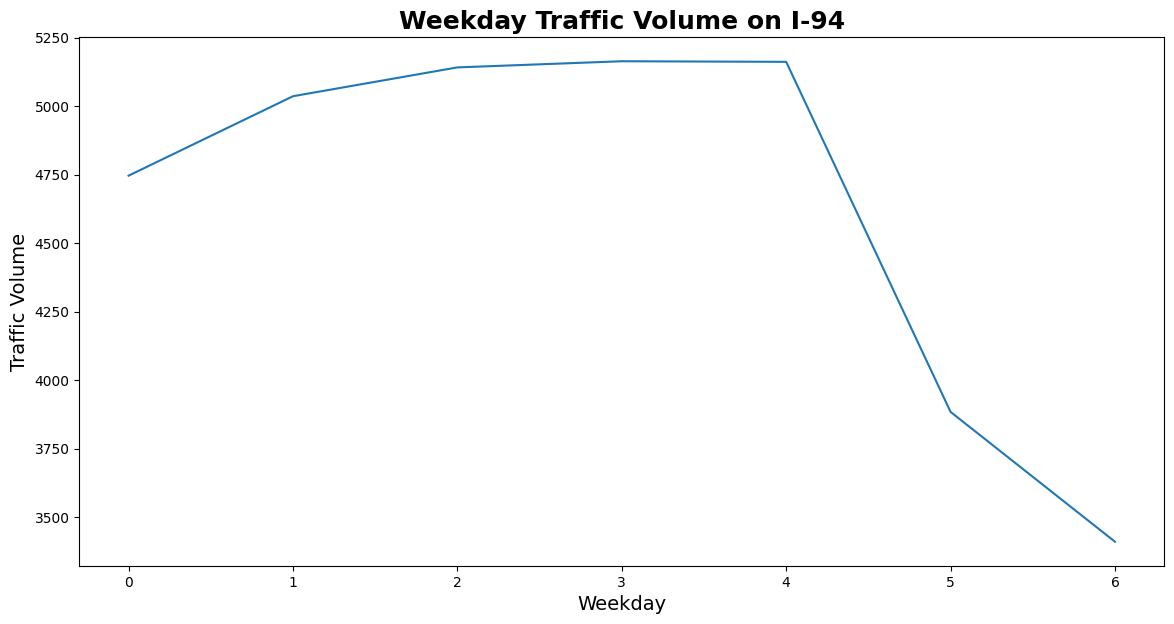

In [6]:
# traffic volume averages for each day of the week
daytime_traffic['dayofweek'] = daytime_traffic['date_time'].dt.dayofweek
by_dayofweek = daytime_traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

# Draw a line plot with traffic volume and month.
plt.figure(figsize=(14, 7))
plt.plot(by_dayofweek['traffic_volume'])

# Set plot title and labels
plt.title('Weekday Traffic Volume on I-94', fontsize=18, weight='bold')
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.show()

Observations:
    Weekly average traffic on Monday to Friday (business days) is increases from 4750 to 5163 whereas on weekends the count is 3410.
    business days has move traffic compares to weekends.

### Splitting business day and weekends seperately.

In [7]:
# traffic volume averages for business days. and weekends.
daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour
bussiness_days = daytime_traffic.copy()[daytime_traffic['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_traffic.copy()[daytime_traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

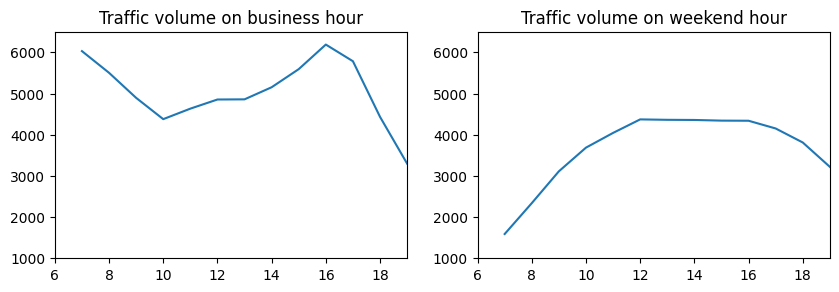

In [8]:
# Draw a line plot with traffic volume on business hour.
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])

# Set plot title and labels
plt.title('Traffic volume on business hour')
plt.xlim(6,19)
plt.ylim(1000,6500)

# Draw a line plot with traffic volume on weekends.
plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])

# Set plot title and labels
plt.title('Traffic volume on weekend hour')
plt.xlim(6,19)
plt.ylim(1000,6500)
plt.show()

Observation:
    Traffic is high in business day than weekend. The time between 7 am to 4 pm the traffic is high suggest people are travelling to work and to home.

### Weather indicators

In [9]:
# Find correlation values between traffic volume and numerical weather columns.
daytime_traffic.corr() [['traffic_volume']]

,traffic_volume
temp,0.118084
rain_1h,0.004020
snow_1h,0.003768
clouds_all,-0.033410
traffic_volume,1.000000
month,-0.017397
dayofweek,-0.371023
hour,-0.007369


Observation:
    temp column shows the strongest correlation value (0.12). But it is weak correlation, lets plot for a scatter graph to confirm.

Text(0, 0.5, 'Temp')

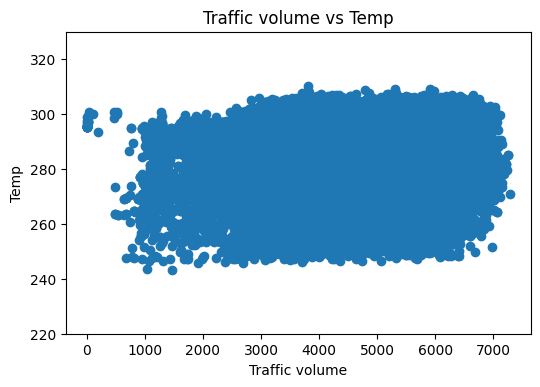

In [10]:
plt.scatter(daytime_traffic['traffic_volume'], daytime_traffic['temp'])
plt.ylim(220,330)
plt.title('Traffic volume vs Temp')
plt.xlabel('Traffic volume')
plt.ylabel('Temp')

Observation:
    Since numerical correlation are very low, we can analyze other metrics like weather_main and weather_description. 

### Weather Types

In [11]:
by_weather_main = daytime_traffic.groupby('weather_main').mean()
by_weather_description = daytime_traffic.groupby('weather_description').mean()

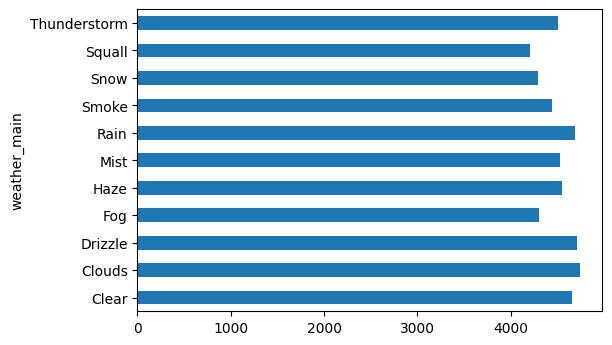

In [16]:
# plot horizontal bar plot for the traffic volumne by weather main column.
by_weather_main["traffic_volume"].plot.barh()
plt.show()

Observation:
    Since every weather types shows no traffic volume is greater than 5000. So, We can analyze weather description column.

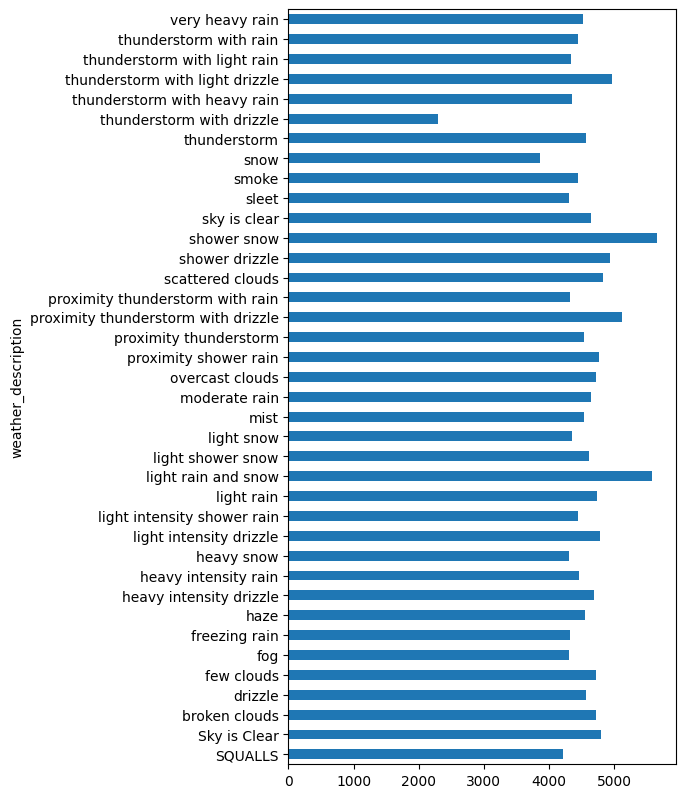

In [26]:
# plot horizontal bar plot for the traffic volumne by weather main column.
by_weather_description["traffic_volume"].plot.barh(figsize=(5, 10))
plt.show()

In [27]:
by_weather_description["traffic_volume"]

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4802.848812
broken clouds                          4715.715045
drizzle                                4572.176849
few clouds                             4720.890763
fog                                    4298.933511
freezing rain                          4314.000000
haze                                   4545.434932
heavy intensity drizzle                4696.533333
heavy intensity rain                   4465.771429
heavy snow                             4300.826087
light intensity drizzle                4783.706362
light intensity shower rain            4437.454545
light rain                             4735.882162
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4347.850144
mist                                   4530.901782
moderate rain                          4639.564103
overcast cl

    Observation:
    There are three weathers where traffic volume is greater than 5000.
    (-) light rain and snow
    (-) proximity thunderstorm with drizzle
    (-) shower snow

These are slightly bad weather conditions,but these weather conditons are having the highest frequency of heavy traffic. These are conditons may impact traffic but not everytime.

Conclusion:
    The findings is that the traffic volumes are high during the morning and evening rush hours on business days and its volume is low during nighttime and weekends. Weather conditions such as "Light rain and snow", "proximity thunderstorm with drizzle" and "Shower snow" correlate with increased traffic (i.e., more than 5000).